<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2021/22 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import os
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pandas as pd

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.99
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


In [2]:
base_dir = 'D:\DlAsg'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

img_size = 150
datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rotation_range=45,  
    width_shift_range=0.125,  
    height_shift_range=0.125,  
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2, 
    rescale=1./255,
    fill_mode='nearest'
)
# Self Train Model 1

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

conv_base = MobileNetV2(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 10)


C:\Users\Asus\anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


## Step 2:  Develop the Image Classification Models

### Model #1

In [3]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [4]:
# Train the Model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=100)

Train for 375 steps, validate for 100 steps
Epoch 1/50
375/375 [==============================] - 174s 464ms/step - loss: 2.0875 - acc: 0.2459 - val_loss: 1.8714 - val_acc: 0.3565
Epoch 2/50
375/375 [==============================] - 92s 244ms/step - loss: 1.8157 - acc: 0.3635 - val_loss: 1.7154 - val_acc: 0.3965
Epoch 3/50
375/375 [==============================] - 92s 247ms/step - loss: 1.6873 - acc: 0.4163 - val_loss: 1.5439 - val_acc: 0.4660
Epoch 4/50
375/375 [==============================] - 94s 251ms/step - loss: 1.5731 - acc: 0.4556 - val_loss: 1.7028 - val_acc: 0.4435
Epoch 5/50
375/375 [==============================] - 88s 236ms/step - loss: 1.5155 - acc: 0.4803 - val_loss: 1.3845 - val_acc: 0.5170
Epoch 6/50
375/375 [==============================] - 94s 252ms/step - loss: 1.4433 - acc: 0.5020 - val_loss: 1.2780 - val_acc: 0.5750
Epoch 7/50
375/375 [==============================] - 80s 212ms/step - loss: 1.3961 - acc: 0.5233 - val_loss: 1.2289 - val_acc: 0.5800
Epoch 8/50

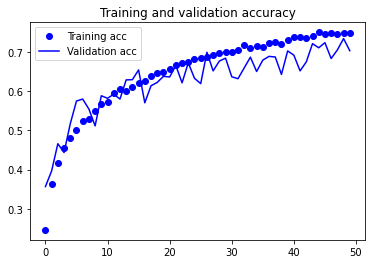

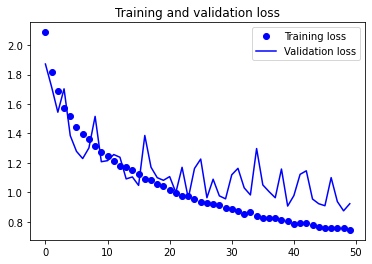

In [5]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:
# Save the Model
model.save('food_model_scratch1_best3.h5')
model.save('food_model_scratch1_best3.json')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: food_model_scratch1_best3.json\assets


# Model #2


In [3]:
# Build the Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [7]:
# Train the Model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=5e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=100)


Train for 375 steps, validate for 100 steps
Epoch 1/50
375/375 [==============================] - 120s 319ms/step - loss: 0.8565 - acc: 0.7683 - val_loss: 1.0629 - val_acc: 0.7130
Epoch 2/50
375/375 [==============================] - 124s 331ms/step - loss: 0.8312 - acc: 0.7735 - val_loss: 1.0667 - val_acc: 0.7150
Epoch 3/50
375/375 [==============================] - 134s 358ms/step - loss: 0.8109 - acc: 0.7809 - val_loss: 1.1263 - val_acc: 0.6895
Epoch 4/50
375/375 [==============================] - 129s 345ms/step - loss: 0.8119 - acc: 0.7833 - val_loss: 1.1546 - val_acc: 0.6880
Epoch 5/50
375/375 [==============================] - 175s 468ms/step - loss: 0.8098 - acc: 0.7807 - val_loss: 1.1566 - val_acc: 0.6880
Epoch 6/50
375/375 [==============================] - 133s 355ms/step - loss: 0.8008 - acc: 0.7892 - val_loss: 1.0311 - val_acc: 0.7095
Epoch 7/50
375/375 [==============================] - 134s 357ms/step - loss: 0.7932 - acc: 0.7819 - val_loss: 1.0830 - val_acc: 0.7100
Epoc

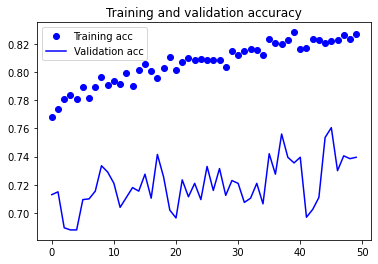

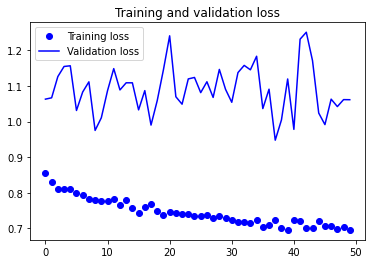

In [8]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
# Save the Model
model.save('food_model_scratch2_best2.h5')
model.save('food_model_scratch2_best2.json')

INFO:tensorflow:Assets written to: food_model_scratch2_best2.json\assets


# Model #3


In [10]:
# Build the Model
#Using Conv2d Base of MobileNetv2


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.LayerNormalization())
model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.01),activation='softmax'))


conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name[0:8] ==  'block_14':
        set_trainable = True # after black5_conv1, set_trainable becomes True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [11]:
# Train the Model

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=375,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=100,
      verbose=1)


Train for 375 steps, validate for 100 steps
Epoch 1/20
375/375 [==============================] - 126s 335ms/step - loss: 0.6993 - acc: 0.9256 - val_loss: 1.5420 - val_acc: 0.7635
Epoch 2/20
375/375 [==============================] - 106s 282ms/step - loss: 0.4165 - acc: 0.9396 - val_loss: 1.4655 - val_acc: 0.7580
Epoch 3/20
375/375 [==============================] - 107s 286ms/step - loss: 0.3758 - acc: 0.9400 - val_loss: 1.4596 - val_acc: 0.7500
Epoch 4/20
375/375 [==============================] - 125s 332ms/step - loss: 0.3595 - acc: 0.9436 - val_loss: 1.4709 - val_acc: 0.7550
Epoch 5/20
375/375 [==============================] - 140s 374ms/step - loss: 0.3527 - acc: 0.9407 - val_loss: 1.6080 - val_acc: 0.7395
Epoch 6/20
375/375 [==============================] - 162s 431ms/step - loss: 0.3379 - acc: 0.9455 - val_loss: 1.3240 - val_acc: 0.7740
Epoch 7/20
375/375 [==============================] - 153s 408ms/step - loss: 0.3273 - acc: 0.9485 - val_loss: 1.6132 - val_acc: 0.7365
Epoc

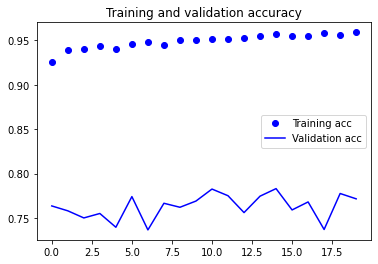

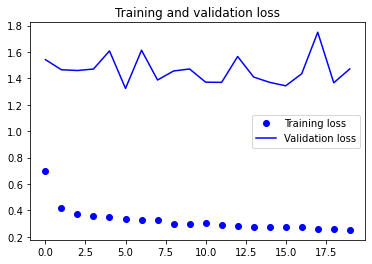

In [12]:
# Plot the Training and Validation Accuracy & Loss Scores
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
# Save the Model
model.save('MobileNetv2_model_layernormal.h5')
model.save('MobileNetv2_model_layernormal.json')

INFO:tensorflow:Assets written to: MobileNetv2_model_layernormal.json\assets


## Step 3 – Evaluate the Developed Models using Testing Images

In [5]:
# Model #1
new_model = models.load_model('food_model_scratch1_best3.h5')
# Evaluate the model
print(new_model.summary())
new_model.load_weights('food_model_scratch1_best3.h5')

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')
test_loss, test_acc = new_model.evaluate(test_generator, steps = 25)
print("Test acc:", + test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
# Model #2
new_model = models.load_model('food_model_scratch2_best2.h5')
# Evaluate the model
print(new_model.summary())
new_model.load_weights('food_model_scratch2_best2.h5')

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')
test_loss, test_acc = new_model.evaluate(test_generator, steps = 25)
print("Test acc:", + test_acc)




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       1

In [7]:
# Model 3, first model
new_model = models.load_model('MobileNetv2_model_best.h5')
# Evaluate the model
print(new_model.summary())
new_model.load_weights('MobileNetv2_model_best.h5')

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')
test_loss, test_acc = new_model.evaluate(test_generator, steps = 25)
print("Test acc:", + test_acc)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_3 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               8192256   
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 10,453,834
Trainable params: 9,721,418
Non-trainable params: 732,416
_________________________________________________________________
None
Found 500 images belonging to 10 classes.
25/25 [==============================] - 5s 186ms/step -

In [10]:
# Model 3, second model
new_model = models.load_model('MobileNetv2_model_best2.h5')
# Evaluate the model
print(new_model.summary())
new_model.load_weights('MobileNetv2_model_best2.h5')

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')
test_loss, test_acc = new_model.evaluate(test_generator, steps = 25)
print("Test acc:", + test_acc)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_3 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               8192256   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 10,453,834
Trainable params: 9,721,418
Non-trainable params: 732,416
_____________________________________

In [15]:
# Model 3, third model 
new_model = models.load_model('MobileNetv2_model_layernormal.h5')
# Evaluate the model
print(new_model.summary())
new_model.load_weights('MobileNetv2_model_layernormal.h5')

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=20,
        class_mode='categorical')
test_loss, test_acc = new_model.evaluate(test_generator, steps = 25)
print("Test acc:", + test_acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               8192256   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
layer_normalization_2 (Layer (None, 256)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 10,453,322
Trainable params: 9,721,418
Non-trainable params: 731,904
_____________________________________

In [13]:
# Save the best model

# Model 3
new_model = models.load_model('MobileNetv2_model_best.h5')
# Evaluate the model
print(new_model.summary())
new_model.load_weights('MobileNetv2_model_best.h5')


new_model.save('Best-food-model-nicolasteo.h5')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_3 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               8192256   
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 10,453,834
Trainable params: 9,721,418
Non-trainable params: 732,416
_________________________________________________________________
None


## Step 4  – Use the best model to make prediction

In [18]:
# Load the model
model = models.load_model('Best-food-model-nicolasteo.h5')
model.load_weights('Best-food-model-nicolasteo.h5')

In [15]:
# Load the food list (in alphabetical order)
with open('39.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['ceviche', 'cheese_plate', 'cheesecake', 'croque_madame', 'escargots', 'french_toast', 'hot_and_sour_soup', 'miso_soup', 'paella', 'risotto']


In [16]:
# Define some related functions for image process and model prediction
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

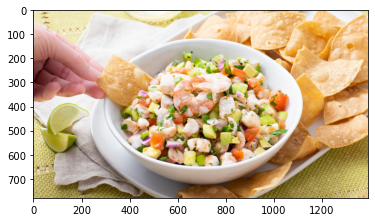

The prediction is:  ceviche 

    ceviche  cheese_plate    cheesecake  croque_madame     escargots  \
0      1.0  1.218852e-09  6.846334e-12   3.139785e-10  9.015018e-09   

   french_toast  hot_and_sour_soup     miso_soup        paella       risotto  
0  6.834607e-11       1.035273e-09  6.144071e-10  3.645656e-09  2.128772e-10  


In [19]:
# Make prediction for the image you downloaded from internet
img = 'Shrimp-Ceviche.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

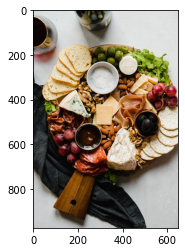

The prediction is:  cheese_plate 

         ceviche  cheese_plate  cheesecake  croque_madame  escargots  \
0  6.094227e-07      0.806508    0.000003   3.734589e-07   0.000007   

   french_toast  hot_and_sour_soup  miso_soup    paella   risotto  
0      0.193265       1.239100e-07   0.000005  0.000001  0.000209  


In [20]:
# Make prediction for the image you downloaded from internet
img = 'cheese-plate.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

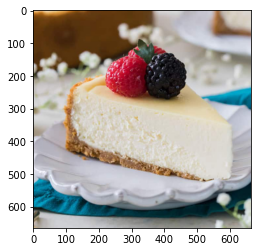

The prediction is:  cheesecake 

         ceviche  cheese_plate  cheesecake  croque_madame     escargots  \
0  1.985037e-08  1.216334e-07    0.999999   1.322499e-07  2.629164e-08   

   french_toast  hot_and_sour_soup     miso_soup        paella       risotto  
0  3.395007e-07       1.560717e-08  3.134577e-10  2.468986e-08  5.228080e-08  


In [21]:
# Make prediction for the image you downloaded from internet
img = 'Cheesecake.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

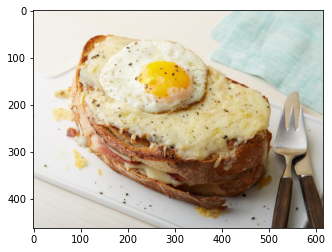

The prediction is:  croque_madame 

         ceviche  cheese_plate    cheesecake  croque_madame     escargots  \
0  1.471582e-09  1.598148e-10  9.146136e-10            1.0  2.260657e-07   

   french_toast  hot_and_sour_soup     miso_soup        paella       risotto  
0  8.480950e-08       5.883539e-09  9.102610e-10  8.602860e-09  9.025182e-09  


In [22]:
# Make prediction for the image you downloaded from internet
img = 'croque-madame.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

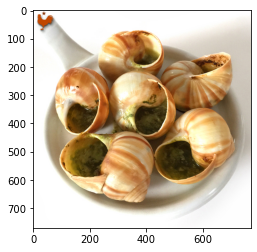

The prediction is:  escargots 

     ceviche  cheese_plate  cheesecake  croque_madame  escargots  french_toast  \
0  0.000122      0.000002    0.000027   4.630698e-07   0.999645  4.589930e-08   

   hot_and_sour_soup     miso_soup        paella       risotto  
0           0.000203  1.886694e-07  1.501552e-09  1.842500e-13  


In [23]:
# Make prediction for the image you downloaded from internet
img = 'escargots.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

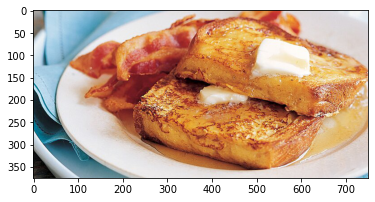

The prediction is:  french_toast 

         ceviche  cheese_plate    cheesecake  croque_madame     escargots  \
0  1.242501e-09  1.263367e-10  1.172296e-11   1.048779e-08  9.510661e-10   

   french_toast  hot_and_sour_soup     miso_soup        paella       risotto  
0           1.0       1.732424e-09  1.860028e-09  1.951066e-09  1.174904e-10  


In [24]:
# Make prediction for the image you downloaded from internet
img = 'french-toast.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

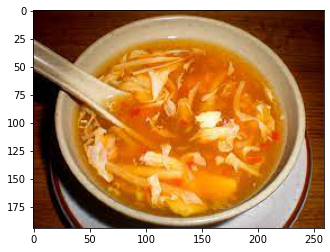

The prediction is:  hot_and_sour_soup 

    ceviche  cheese_plate    cheesecake  croque_madame     escargots  \
0  0.00002  6.741841e-08  4.018296e-08       0.000018  9.635644e-11   

   french_toast  hot_and_sour_soup     miso_soup        paella       risotto  
0  2.460907e-08           0.999962  1.794835e-07  6.566397e-09  9.009242e-10  


In [25]:
# Make prediction for the image you downloaded from internet
img = 'hot-and-sour-soup.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

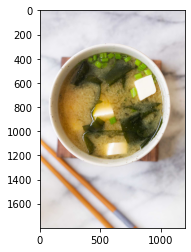

The prediction is:  miso_soup 

         ceviche  cheese_plate    cheesecake  croque_madame     escargots  \
0  3.037416e-08  3.596397e-10  4.652977e-09   1.226511e-07  1.014408e-11   

   french_toast  hot_and_sour_soup  miso_soup        paella       risotto  
0  5.198612e-11       2.215940e-08        1.0  1.251268e-11  3.920459e-08  


In [26]:
# Make prediction for the image you downloaded from internet
img = 'miso-soup.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

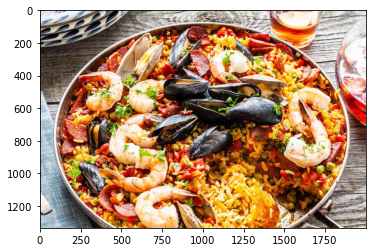

The prediction is:  paella 

         ceviche  cheese_plate    cheesecake  croque_madame     escargots  \
0  1.284122e-09  1.095240e-09  2.447252e-08   1.789156e-10  5.383708e-09   

   french_toast  hot_and_sour_soup     miso_soup  paella       risotto  
0  2.492089e-09       1.667919e-09  6.882735e-11     1.0  4.226680e-09  


In [27]:
# Make prediction for the image you downloaded from internet
img = 'seafood-paella.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

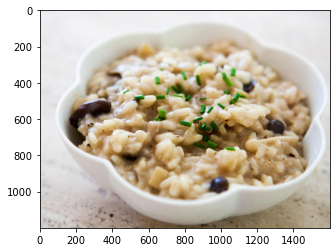

The prediction is:  risotto 

     ceviche  cheese_plate  cheesecake  croque_madame  escargots  french_toast  \
0  0.410599      0.000006     0.00001       0.000019   0.035603      0.000436   

   hot_and_sour_soup  miso_soup    paella   risotto  
0           0.000162   0.006234  0.000217  0.546714  


In [39]:
# Make prediction for the image you downloaded from internet
img = 'risotto.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)